In [23]:
# WEEK 4 – STATISTICAL MODEL SELECTION
# AI Job Replacement & Skill Shift Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
from scipy.stats import f_oneway

In [28]:
# LOAD DATA

df = pd.read_csv("ai_job_replacement_skill_shift_1000.csv")

print("DATA LOADED SUCCESSFULLY\n")
print(df.head())
print("\nColumns in dataset:\n", df.columns)

DATA LOADED SUCCESSFULLY

        industry       job_role education_level  experience_years  \
0      Logistics  Support Staff         Diploma                14   
1  Manufacturing        Teacher     High School                11   
2      Education   Data Analyst        Bachelor                15   
3      Logistics   Data Analyst          Master                23   
4        Finance   Data Analyst        Bachelor                18   

   ai_adoption_level  automation_risk  skill_shift_level  \
0           0.738035         0.885525           0.990354   
1           0.623414         0.561647           0.476511   
2           0.382659         0.380622           0.620241   
3           0.790710         0.994461           1.000000   
4           0.617894         0.594472           0.887514   

   salary_change_percent  job_replacement_probability  
0              35.759843                     0.697923  
1              15.971011                     0.435555  
2              21.249869      

In [27]:
#  SELECT NUMERIC DATA

numeric_df = df.select_dtypes(include=np.number)

In [26]:
# SALARY PREDICTION (LINEAR REGRESSION)

if "Salary" in numeric_df.columns:

    X = numeric_df.drop(columns=["Salary"])
    y = numeric_df["Salary"]

    # Feature Selection
    selector = SelectKBest(score_func=f_regression, k=5)
    X_new = selector.fit_transform(X, y)

    selected_features = X.columns[selector.get_support()]
    print("\nTop Selected Features:", list(selected_features))

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X[selected_features], y, test_size=0.2, random_state=42
    )

    # Model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    print("\nLINEAR REGRESSION RESULTS")
    print("R2 Score:", r2_score(y_test, y_pred))

    # Feature Importance Plot
    plt.figure(figsize=(8,5))
    plt.bar(selected_features, lr.coef_)
    plt.title("Feature Importance (Salary Prediction)")
    plt.xticks(rotation=45)
    plt.show()

else:
    print("\nColumn 'Salary' not found in dataset.")


Column 'Salary' not found in dataset.


In [29]:
#  ANOVA TEST (Industry vs Salary)

if "Industry" in df.columns and "Salary" in df.columns:

    groups = df.groupby("Industry")["Salary"].apply(list)

    if len(groups) >= 2:
        f_stat, p_value = f_oneway(*groups)

        print("\nANOVA TEST RESULT")
        print("P-value:", p_value)

        if p_value < 0.05:
            print("Reject Null Hypothesis: Salary differs by Industry")
        else:
            print("Fail to Reject Null Hypothesis")

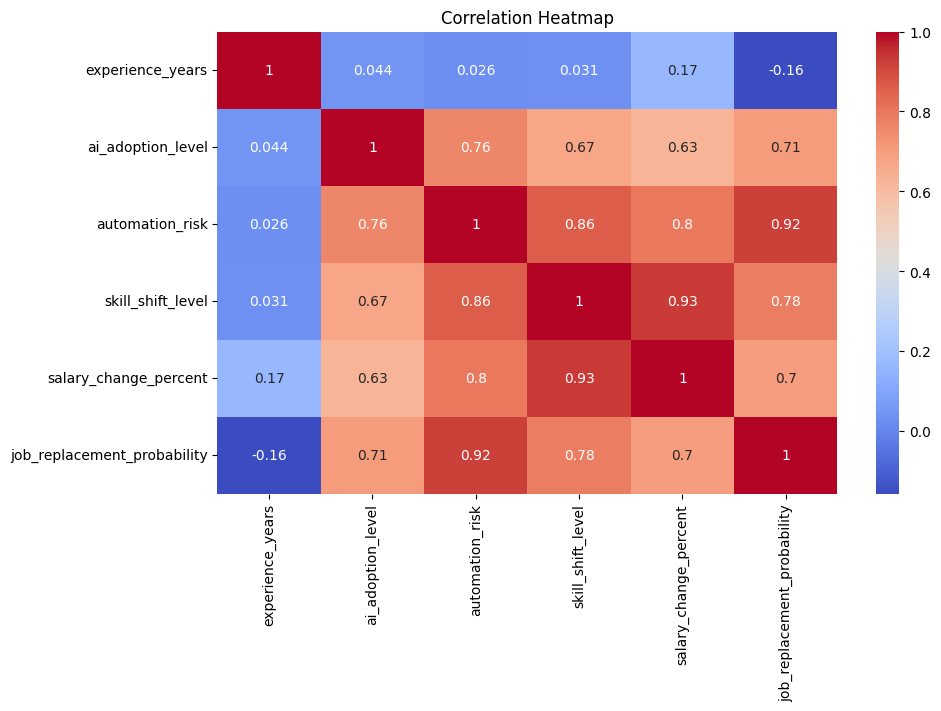


WEEK 4 ANALYSIS COMPLETED SUCCESSFULLY


In [ ]:
#  CORRELATION HEATMAP

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\nWEEK 4 ANALYSIS COMPLETED SUCCESSFULLY")